### Importing all important libraries
##### pandas to read the dataset
##### Numpy is for array and matrix calculations
##### matplotlib is for data visualization

In [ ]:
#importing all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### It's time to read data

In [ ]:
#Reading the dataset
df = pd.read_csv("train.csv")

# Printing top 5 rows of the dataset.
df.head()

In [ ]:
#Printing last 5 rows of the dataset.

df.tail()

In [8]:
# checking number of rows and columns in the dataset.
df.shape

(891, 12)

In [9]:
#getting info about the dataset
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [13]:
#checking total null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
#Dropping all the coloumns in which more than 35% of the dataset is empty
t = df.isnull().sum()
drop_col = t[t>(0.35*df.shape[0])]
drop_col

Cabin    687
dtype: int64

In [22]:
#getting info about correlation where it is positive or negetive which helps us to predict the graph.
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [23]:
#checking the mean for the purpose of finding the males and females present over there 
# 0 is showing for male persons
#1 is showing for female persons

df['Sex'] = [0 if df['Sex'][i]=='male' else 1 for i in df.index]
df.groupby(['Sex'])['Survived'].mean()

Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64

In [24]:
#Calculating family size by adding two columns and finding co-relations between them.

df['Family_size'] = df['SibSp'] + df['Parch']
df.drop(['SibSp' , 'Parch'], axis =1 , inplace = True)
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Family_size
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,-0.549500,0.065997
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.182333,0.200988
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,0.096067,-0.301914
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,1.000000,0.217138
Family_size,-0.040143,0.016639,0.065997,0.200988,-0.301914,0.217138,1.000000


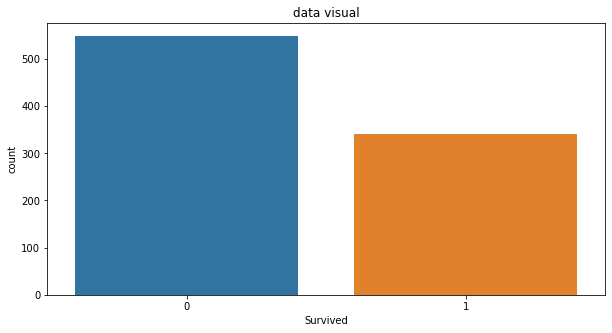

In [10]:
#Plotting the graph between male and female who survived successfully.

plt.figure(figsize=(10,5))
sns.countplot(x='Survived' , data=df)
plt.title("data visual")
plt.show()

In [16]:
#Filling null rows with S so that the data must be more accurate and close to the actual outcome.
df['Embarked'].fillna('S', inplace = True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [21]:
#Taking the mean of age to know about the maximum person belongs to which age category 
mean_age = df['Age'].mean()
mean_age

29.69911764705882

In [23]:
#Filling null rows with mean age so that the data must be more accurate and close to the actual outcome.
df['Age'].fillna('mean_age', inplace = True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# Conclusion

### By reading dataset we got to know a deep info about the data.
### Get to know the number of empty columns.
### Get to know the how to fill the empty columns by mean.
### By making group of male and female we got to know that females are more than male in the given dataset.
### By adding two columns we got to know about the total 
